# Manuel Romero García
## Máster en Big Data y Data Science
### Práctica Machine Learning

### 1. Importación, análisis exploratorio del dataset y depuración

In [104]:
import pandas as pd
dfx = pd.read_csv('4910797b-ee55-40a7-8668-10efd5c1b960.csv')
dfy = pd.read_csv('0bf8bc6e-30d0-4c50-956a-603fc693d966.csv')
dfx2 = pd.read_csv('702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv')

In [105]:
print(dfx.info())
print()
print(dfy.info())
print()
print(dfx2.info())
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [106]:
# guardamos ids test y juntamos X
ids_test = dfx2.id
dfx = pd.concat([dfx, dfx2])
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     74250 non-null  int64  
 1   amount_tsh             74250 non-null  float64
 2   date_recorded          74250 non-null  object 
 3   funder                 69746 non-null  object 
 4   gps_height             74250 non-null  int64  
 5   installer              69718 non-null  object 
 6   longitude              74250 non-null  float64
 7   latitude               74250 non-null  float64
 8   wpt_name               74250 non-null  object 
 9   num_private            74250 non-null  int64  
 10  basin                  74250 non-null  object 
 11  subvillage             73780 non-null  object 
 12  region                 74250 non-null  object 
 13  region_code            74250 non-null  int64  
 14  district_code          74250 non-null  int64  
 15  lg

In [107]:
dfx.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,74250.000000,74250.000000,74250.000000,74250.000000,7.425000e+04,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000
mean,37124.500000,318.685704,665.667313,34.074262,-5.701771e+00,0.462330,15.265414,5.629077,180.750828,1298.463650
std,21434.273081,2906.762364,692.761033,6.572519,2.944969e+00,11.537879,17.508907,9.641636,471.086120,952.349375
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18562.250000,0.000000,0.000000,33.086819,-8.525675e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37124.500000,0.000000,364.000000,34.907475,-5.026540e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55686.750000,20.000000,1317.000000,37.181685,-3.325058e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74249.000000,350000.000000,2777.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [108]:
dfx.select_dtypes(include=['object']).describe().transpose()

,count,unique,top,freq
date_recorded,74250,369,2011-03-17,695
funder,69746,2140,Government Of Tanzania,11299
installer,69718,2410,DWE,21751
wpt_name,74250,45684,none,4440
basin,74250,9,Lake Victoria,12871
subvillage,73780,21425,Shuleni,646
region,74250,21,Iringa,6599
lga,74250,125,Njombe,3128
ward,74250,2098,Igosi,386
public_meeting,70095,2,True,63749


In [109]:
len(dfx.id.unique()) == len(dfx)
# el dataset no se puede tratar como serie temporal

True

In [110]:
dfx = dfx.set_index('id')
dfy = dfy.set_index('id')

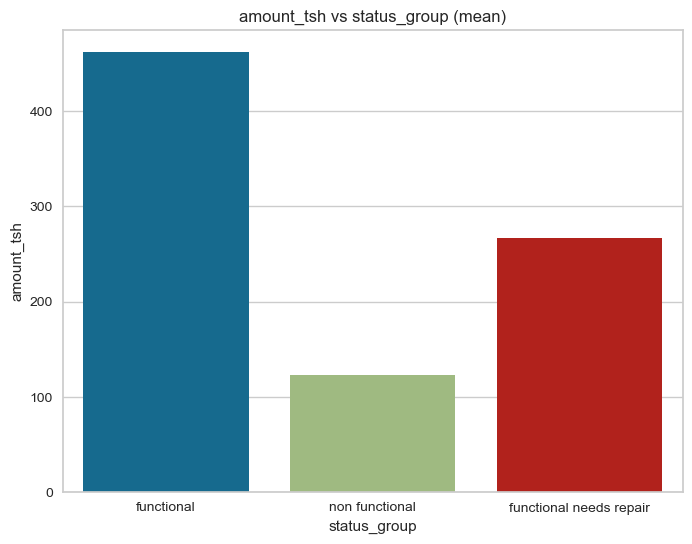

Skipping date_recorded because it has 356 unique values
Skipping funder because it has 1897 unique values


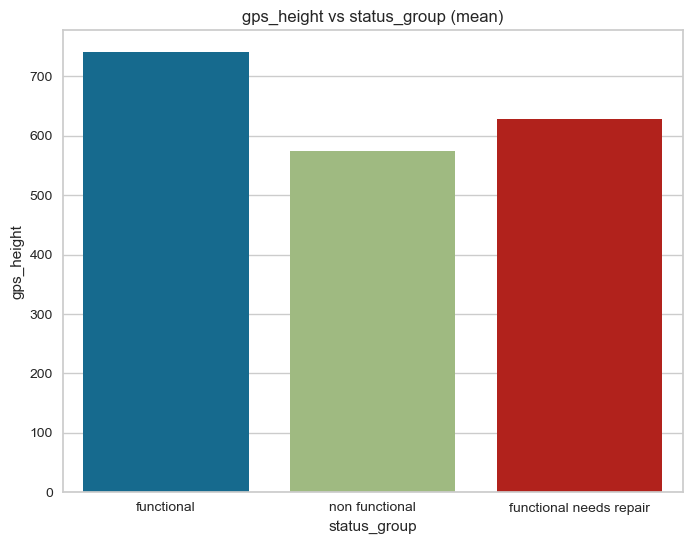

Skipping installer because it has 2145 unique values


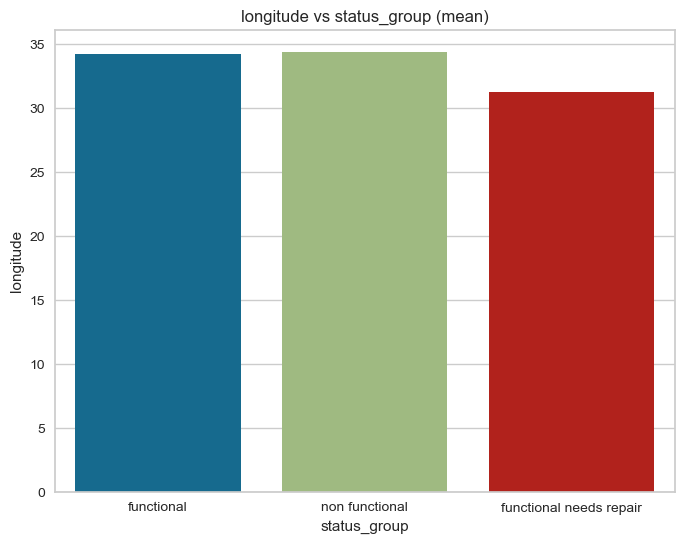

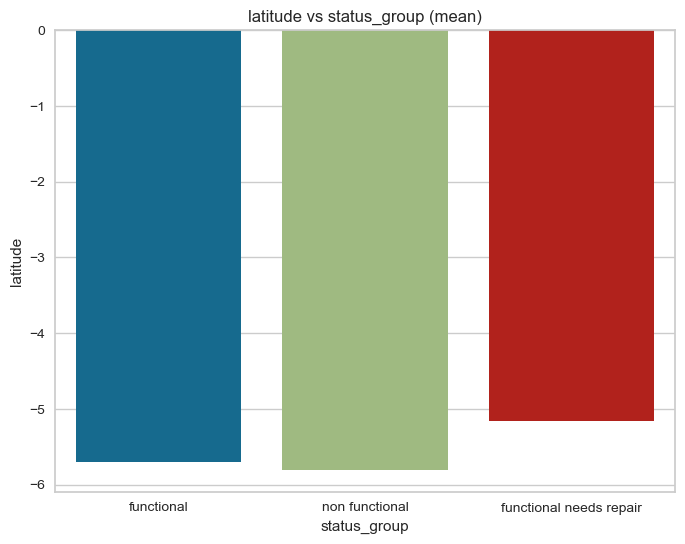

Skipping wpt_name because it has 37400 unique values


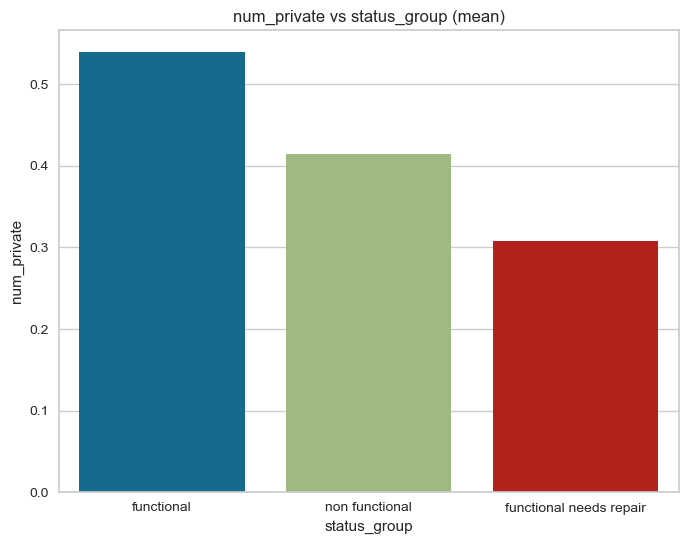

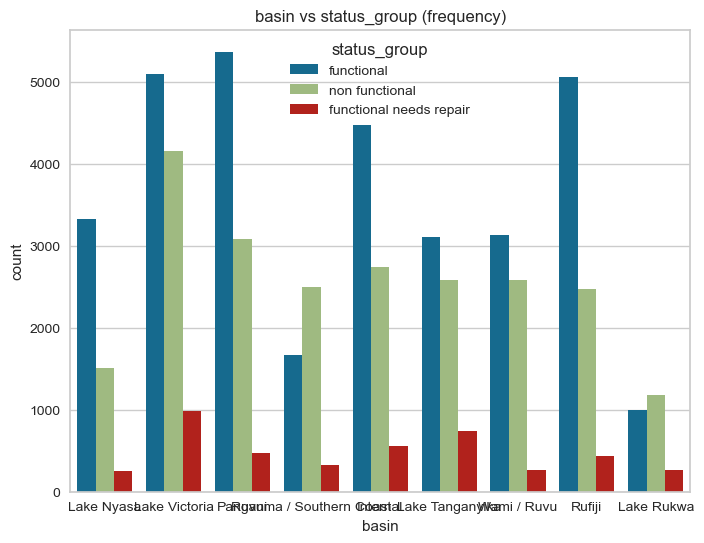

Skipping subvillage because it has 19287 unique values
Skipping region because it has 21 unique values


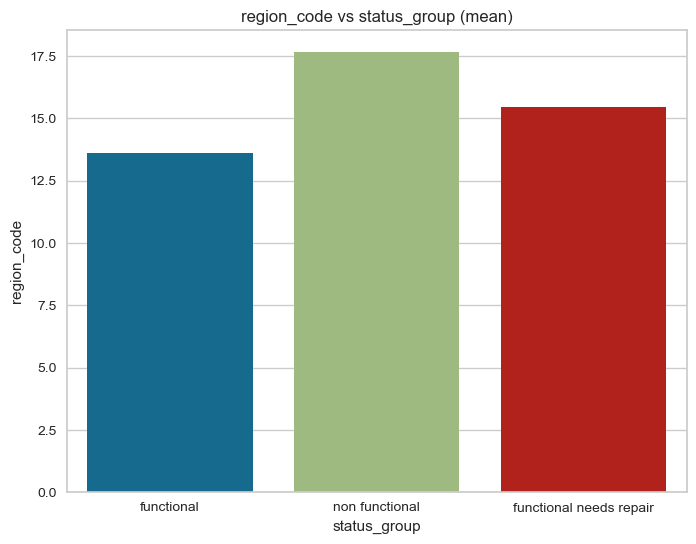

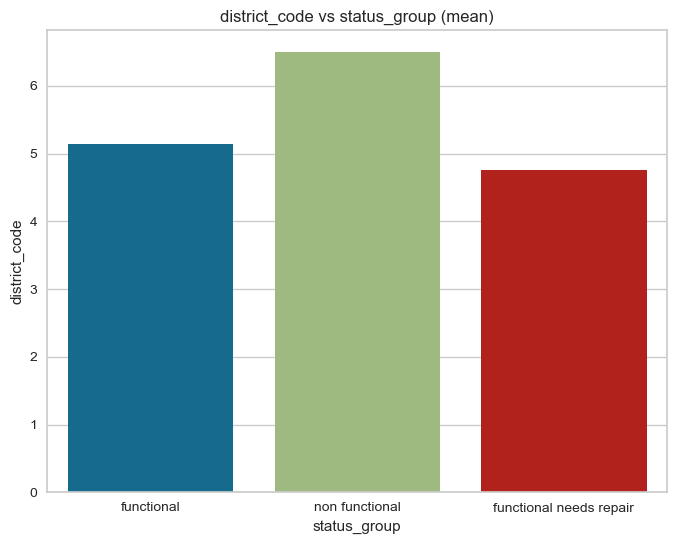

Skipping lga because it has 125 unique values
Skipping ward because it has 2092 unique values


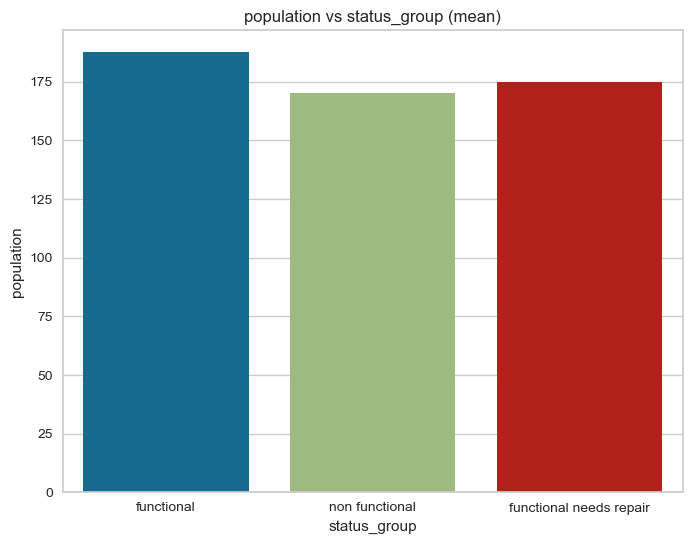

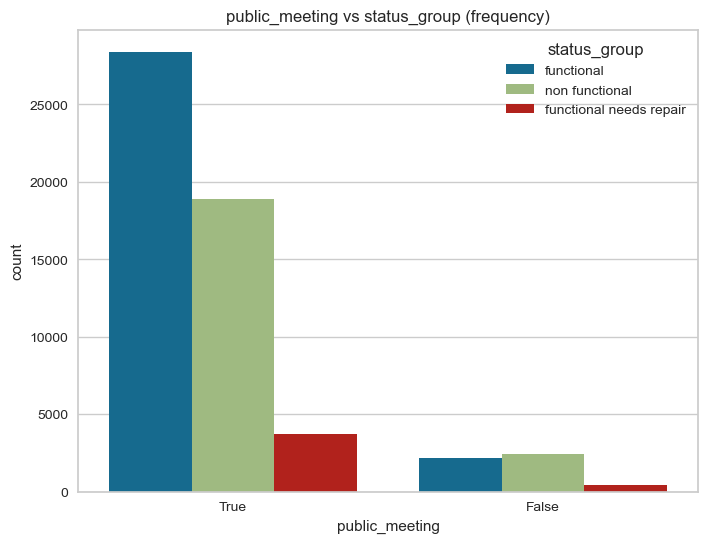

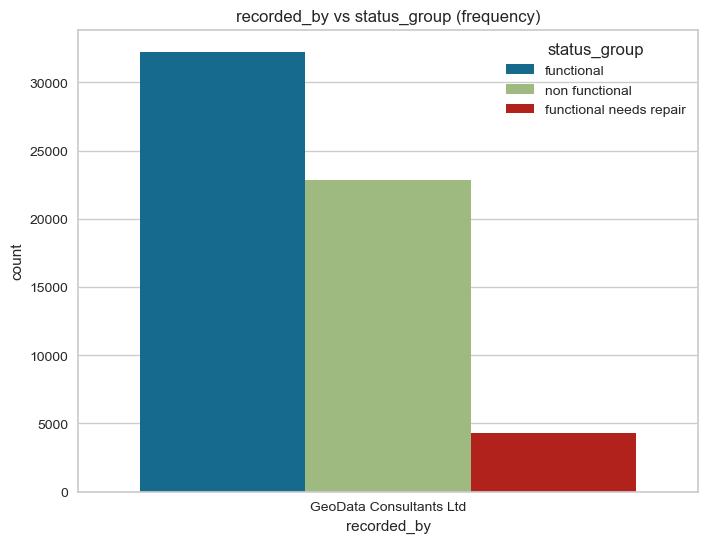

Skipping scheme_management because it has 12 unique values
Skipping scheme_name because it has 2696 unique values


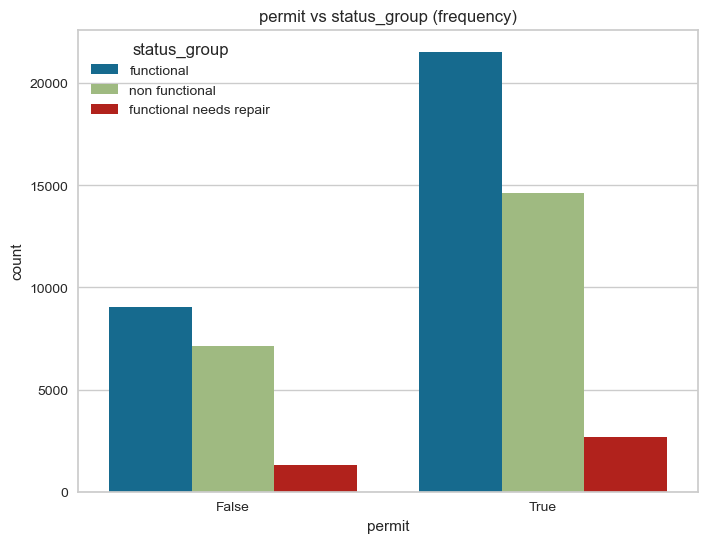

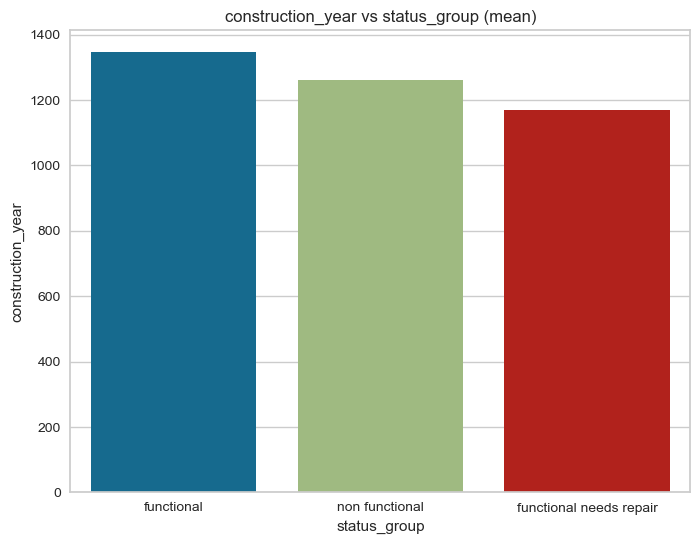

Skipping extraction_type because it has 18 unique values
Skipping extraction_type_group because it has 13 unique values


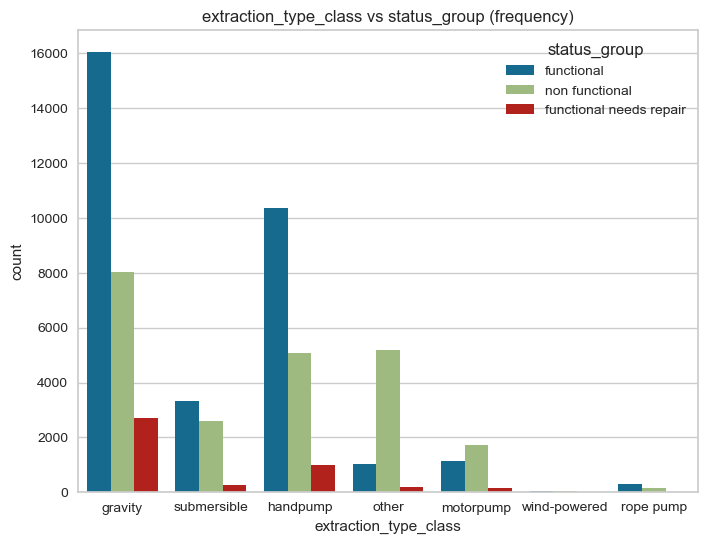

Skipping management because it has 12 unique values


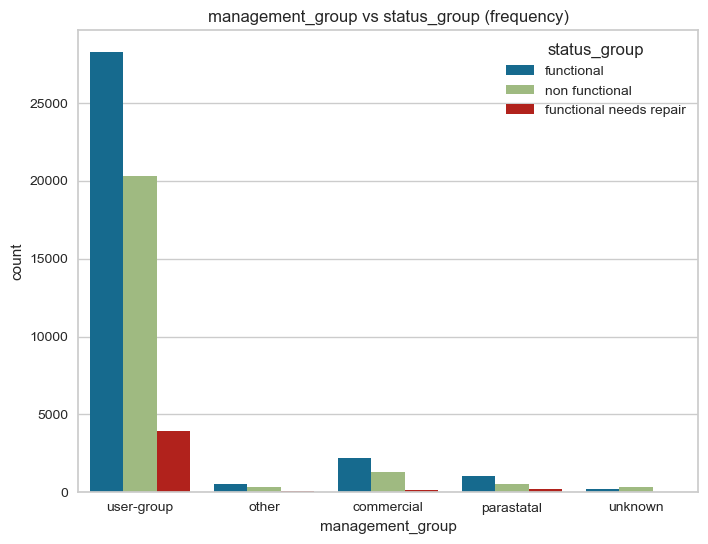

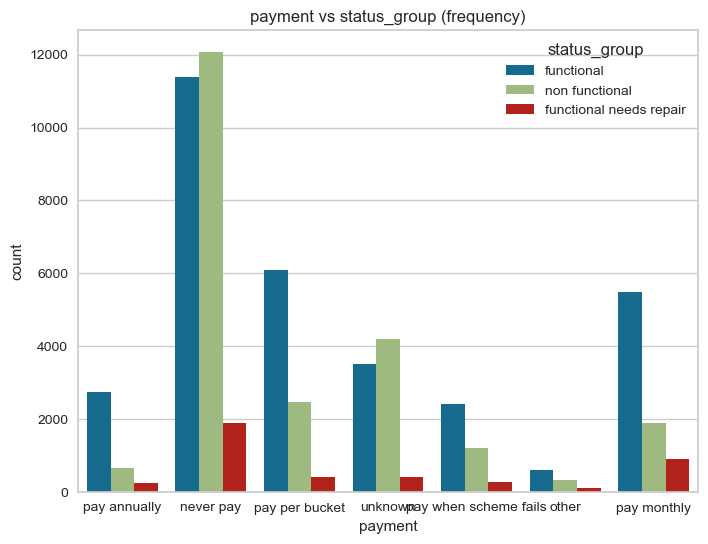

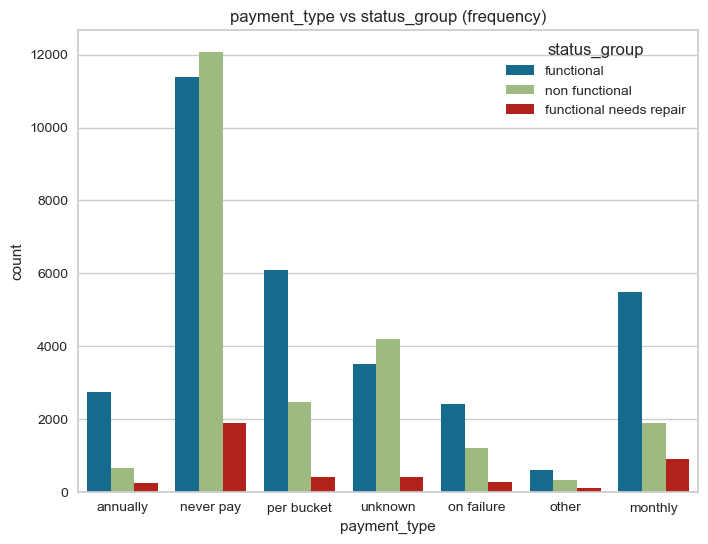

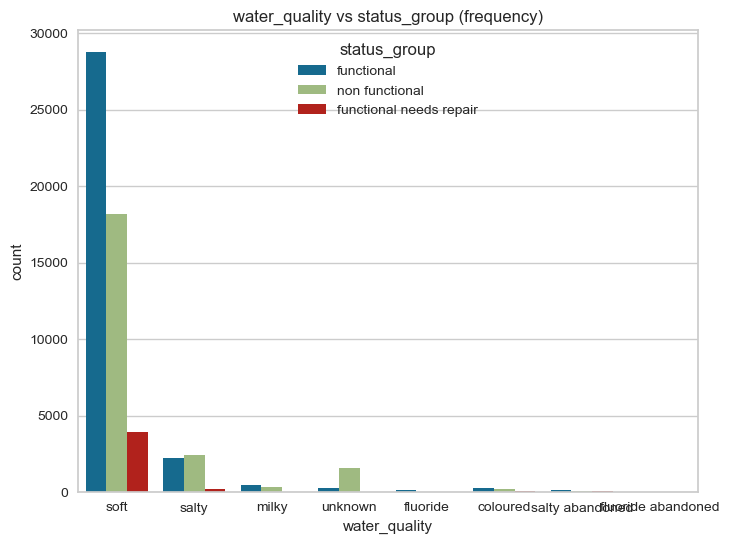

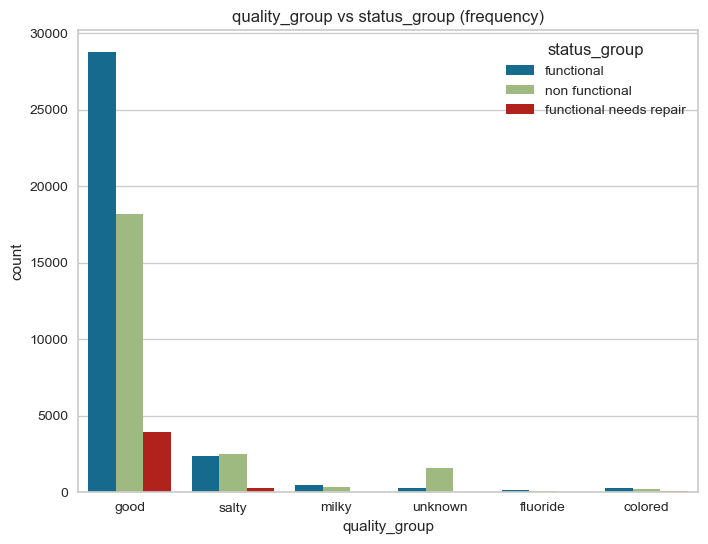

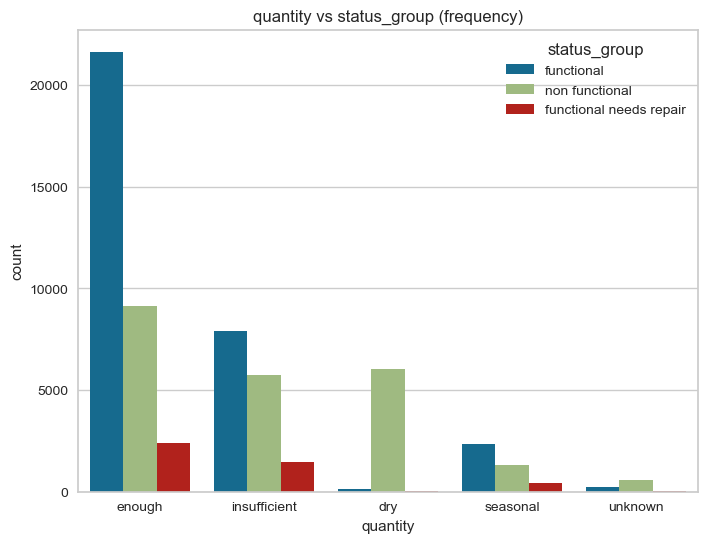

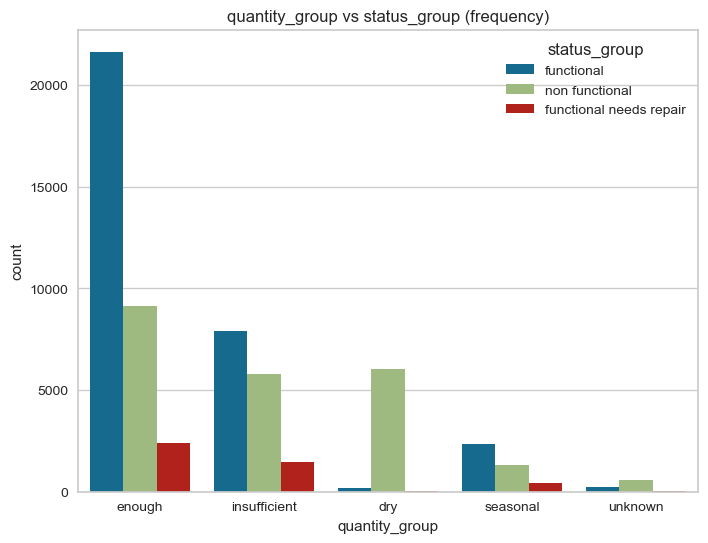

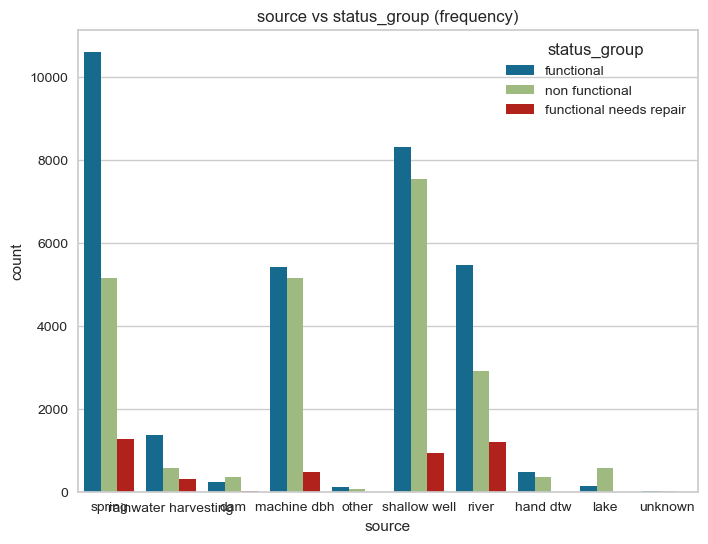

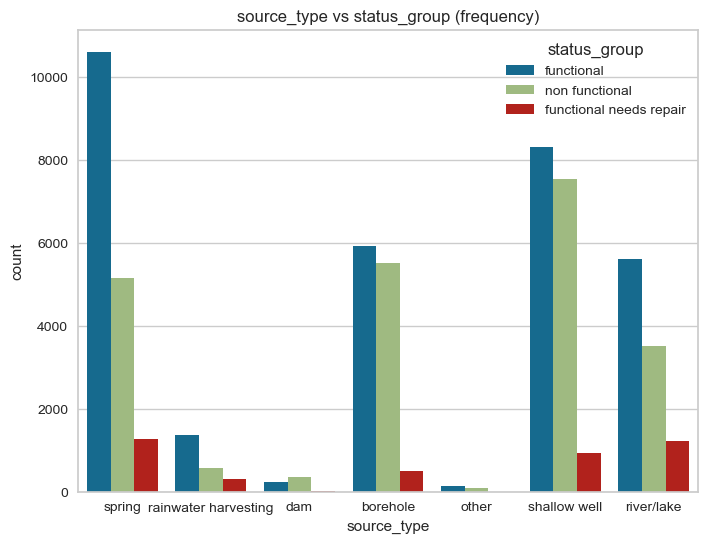

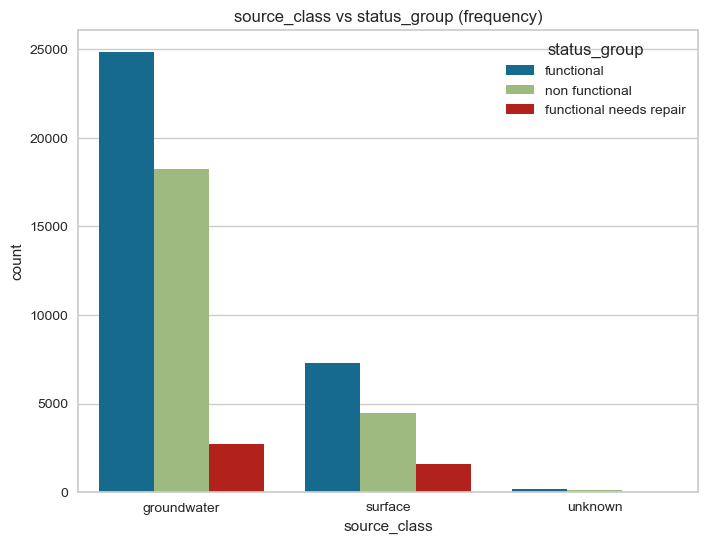

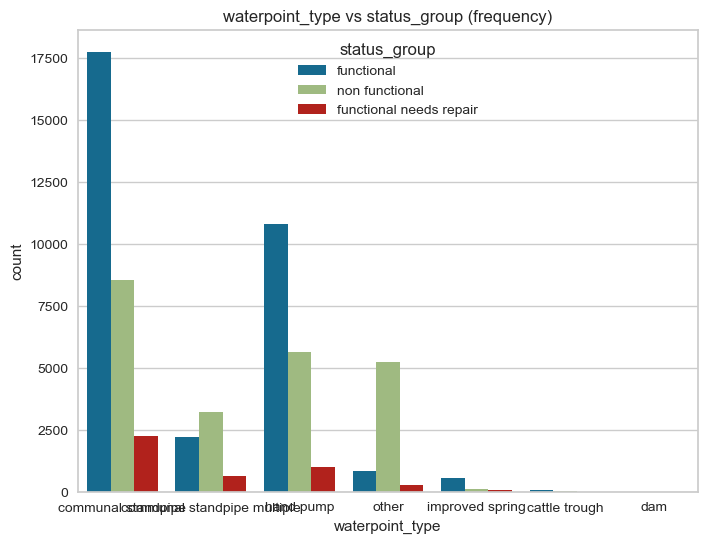

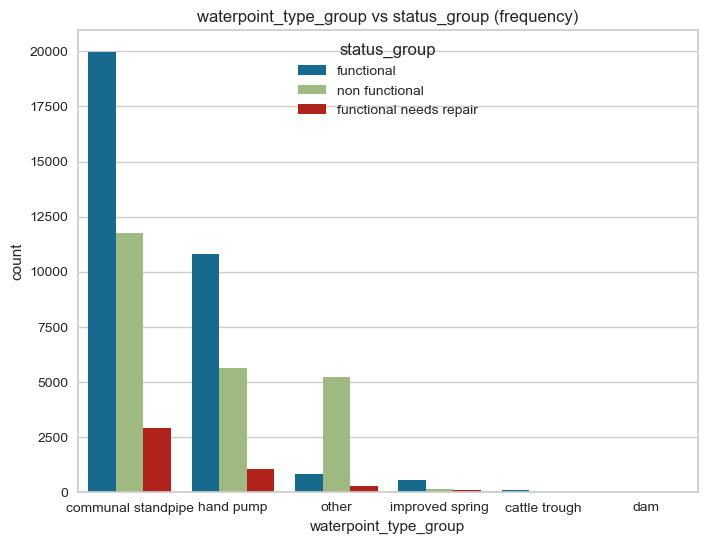

In [111]:
import seaborn as sns
from matplotlib import pyplot as plt

# Nota: ChatGPT prompt

dfmerge = pd.merge(dfx, dfy, left_index=True, right_index=True)
def plot_variable_vs_target(df, target):
    """
    Plot each variable in a dataframe against a target variable using bars,
    using the mean if the variable is numerical and the frequency if the variable is categorical.
    
    Parameters:
    -----------
    df : pandas DataFrame
        The dataframe containing the variables and the target variable.
    target : str
        The name of the target variable.
    """
    variables = df.columns[df.columns != target]
    
    # Loop over each variable and plot it against the target variable
    for var in variables:
         # Determine if the variable is numerical or categorical
         if df[var].dtype == 'object':
             # If the variable is categorical and has more than 20 unique values, skip it
             if df[var].nunique() > 10:
                 print(f'Skipping {var} because it has {df[var].nunique()} unique values')
                 continue
             # If the variable is categorical and has 20 or fewer unique values, plot the frequency of each category
             fig, ax = plt.subplots(figsize=(8,6))
             sns.countplot(x=var, hue=target, data=df, ax=ax)
             plt.title(f'{var} vs {target} (frequency)')
             plt.show()
         else:
             # If the variable is numerical, plot the mean of the variable for each target class
             fig, ax = plt.subplots(figsize=(8,6))
             sns.barplot(x=target, y=var, data=df, estimator=np.mean, ci=None, ax=ax)
             plt.title(f'{var} vs {target} (mean)')
             plt.show()
            
plot_variable_vs_target(dfmerge, 'status_group')

In [112]:
# este dropeo ha sido mezcla de los descriptivos y de lectura de foros
dfx.drop(columns=['scheme_management', 'quantity_group', 'water_quality', 'payment_type', 'extraction_type', 'waterpoint_type_group',\
                'date_recorded', 'recorded_by', 'district_code', 'region_code'], inplace=True)

In [113]:
# algunas categorías son sencillamente mayúsculas de otras
cat_cols = dfx.select_dtypes(include=['object']).columns
dfx[cat_cols] = dfx[cat_cols].applymap(lambda x: x.lower() if isinstance(x, str) else x)

### 3. Agrupación de categorías

 Hay un total de 14.35% valores repetidos más de 100 veces, estos son:
---------------------------------------------------------------------------------------------
k                                        861
none                                     828
borehole                                 704
chalinze wate                            502
m                                        490
danida                                   483
government                               395
bagamoyo wate                            384
ngana water supplied scheme              335
wanging'ombe water supply s              323
wanging'ombe supply scheme               287
i                                        281
uroki-bomang'ombe water sup              266
n                                        258
kirua kahe gravity water supply trust    237
machumba estate pipe line                225
makwale water supplied sche              209
kijiji                                   205
handeni trunk main(h     

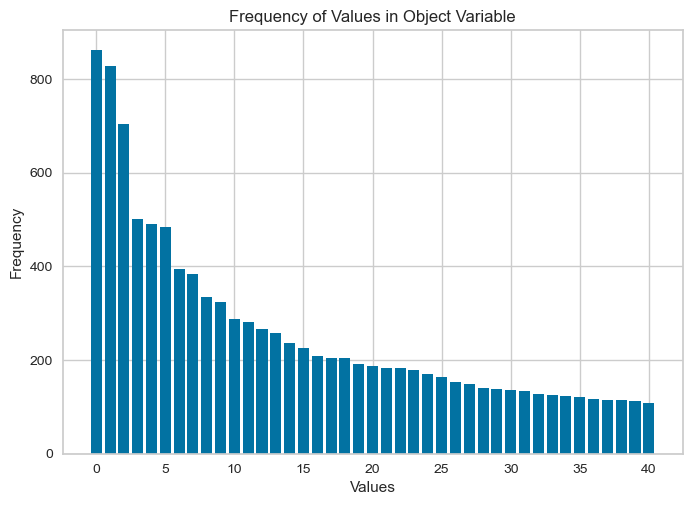

In [114]:
import matplotlib.pyplot as plt
import numpy as np 

# función para observar distribución de categorías
def nomcount(df, col, value, graph=False):
    counts = df[col].value_counts() 
    repeated_values = counts[counts > value].index.tolist()
    result = pd.DataFrame(df[df[col].isin(repeated_values)]['scheme_name'].tolist()) 
    value_counts = result.value_counts()
    print(f" Hay un total de {round(len(result)*100/len(dfx), 2)}% valores repetidos más de {value} veces, estos son:")
    print("---------------------------------------------------------------------------------------------")
    print(value_counts)
    
    if graph:
        x_values = value_counts.index.tolist()
        y_values = value_counts.tolist()
        x_pos = np.arange(len(x_values))
        
        plt.bar(x_pos, y_values)
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.title('Frequency of Values in Object Variable')
        plt.show()
        
nomcount(dfx, 'scheme_name', 100, graph=True)

In [115]:
import scipy.stats as stats

merge_temp = pd.merge(dfx[['scheme_name']].dropna(), dfy, left_index=True, right_index=True)

table = pd.crosstab(merge_temp['scheme_name'], merge_temp['status_group']).values

chi2, p, dof, expected = stats.chi2_contingency(table)

v_cramer = stats.contingency.association(table, method='cramer')
print(v_cramer) # Tiene bastante relación con la variable objetivo, no conviene eliminarla

0.5847194562695178


In [116]:
# seleccionamos las 10 primeras categorías más repetidas de cada variable y convertimos a 'other' las demás, exceptuando '0' y 'nan' que los dejamos como perdidos
n_top = 10
for col in dfx.select_dtypes(include=['object']).drop(columns=['region']):
    dfx[col].replace({'unkown': np.nan, 'none': np.nan, '0': np.nan}, inplace=True)
    freq = dfx[col].value_counts()
    topcats = freq.nlargest(n_top).index
    mask = ~dfx[col].isin(topcats) & ~dfx[col].isna()
    dfx.loc[mask, col] = 'other'

In [117]:
for col in dfx.select_dtypes(include=['object']):
    print(dfx[col].value_counts())

other                     40661
government of tanzania    11299
danida                     3907
hesawa                     2782
rwssp                      1703
world bank                 1701
kkkt                       1623
world vision               1562
unicef                     1324
tasaf                      1136
dhv                        1065
Name: funder, dtype: int64
other                 34553
dwe                   21756
government             2367
hesawa                 1768
rwe                    1498
commu                  1354
danida                 1306
district council       1181
kkkt                   1135
central government      933
tcrs                    887
Name: installer, dtype: int64
other              63884
shuleni             2183
zahanati            1034
msikitini            647
kanisani             390
sokoni               328
bombani              323
ofisini              321
school               260
shule ya msingi      247
shule                191
Name: wp

### 3. Gestión de NAs

In [118]:
# función para observar perdidos:
def na_df(df, pct, drop=False, na_list=True):
    na_pct = df.isna().mean() * 100
    na_pct = na_pct[na_pct > pct] 
    print(na_pct)
    print(f"Hay un total de {round(len(na_pct)*100/len(df.columns), 2)}% con más de un {pct}% de perdidos")
    if drop:
        df = df.drop(na_pct.index, axis=1, inplace=True)
    if na_list:
        na_list = na_pct.index.tolist()
        return na_list

        
na_list = na_df(dfx, 0, False)

funder             7.389899
installer          7.423569
wpt_name           5.982492
subvillage         0.632997
public_meeting     5.595960
scheme_name       48.600673
permit             5.108418
dtype: float64
Hay un total de 24.14% con más de un 0% de perdidos


In [119]:
# sustituimos perdidos por la mediana o por la moda de cada región, dependiendo del tipo de variable:
grouped = dfx.groupby('region')

def mode_func(x):
    return x.mode()

modes = dfx.groupby('region').agg(mode_func)
medians = dfx.groupby('region').transform('median')

for col in na_list:
    if col in dfx.select_dtypes(include=[np.number]).columns.to_list():
        print(col)
        dfx[col].fillna(medians[col], inplace=True)
        print("--")
    else:
        print(col)
        dfx[col].fillna(modes.loc[dfx['region'], col].values[0], inplace=True)

funder
installer
wpt_name
subvillage
public_meeting
scheme_name
permit


In [120]:
na_df(dfx, 0, False)

Series([], dtype: float64)
Hay un total de 0.0% con más de un 0% de perdidos


[]

### 4. Outliers

In [121]:
for col in dfx.select_dtypes(include=[np.number]):
    q1 = dfx[col].quantile(0.25)
    q3 = dfx[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 3 * iqr
    upper = q3 + 3 * iqr
    mask = (dfx[col] < lower) | (dfx[col] > upper)
    median_by_region = dfx[~mask].groupby('region')[col].median()
    dfx.loc[mask, col] = dfx[mask].groupby('region')[col].transform(lambda x: median_by_region.loc[x.name] if x.name in median_by_region.index else x.median())

In [122]:
na_df(dfx, 0)

Series([], dtype: float64)
Hay un total de 0.0% con más de un 0% de perdidos


[]

### 5. Variable espacial laggeada

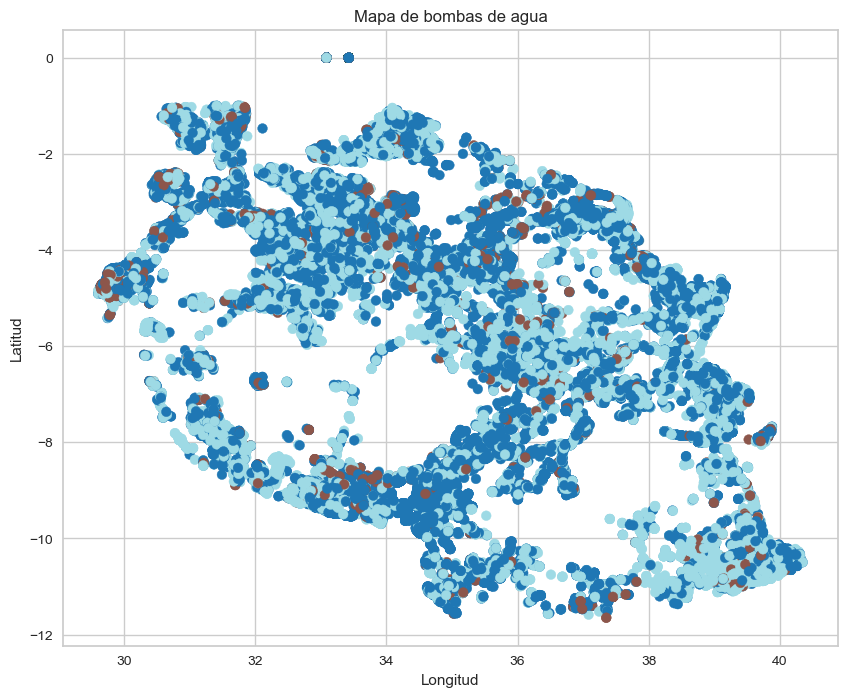

In [123]:
from matplotlib import pyplot as plt
dfmerge = pd.merge(dfx, dfy, left_index=True, right_index=True)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(dfmerge.status_group)

# Transform column 'a' with LabelEncoder
dfmerge.status_group = le.transform(dfmerge.status_group)


fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(dfmerge['longitude'], dfmerge['latitude'], c=dfmerge['status_group'], cmap='tab20')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_title('Mapa de bombas de agua')
plt.show()

In [124]:
import geopandas as gpd
import libpysal.weights as weights
import esda
geometry = gpd.points_from_xy(dfmerge['longitude'], dfmerge['latitude'])
data = gpd.GeoDataFrame(dfmerge, geometry=geometry)

w = weights.KNN.from_dataframe(data, k=5)

y = data['status_group']
ylag = weights.lag_spatial(w, y)

sar = esda.Moran(y, w)
print(sar.I)
# La I de Moran es alta, es posible que la variable sea útil

data['lagged'] = ylag

0.3412297700220786


In [125]:
dfx['lagged'] = data['lagged']
medians = dfx.groupby('region').transform('median')
dfx['lagged'].fillna(medians['lagged'], inplace=True)
dfx.drop(columns=['region', 'latitude', 'longitude', 'gps_height', 'num_private'], inplace=True)
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 69572 to 68707
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             74250 non-null  float64
 1   funder                 74250 non-null  object 
 2   installer              74250 non-null  object 
 3   wpt_name               74250 non-null  object 
 4   basin                  74250 non-null  object 
 5   subvillage             74250 non-null  object 
 6   lga                    74250 non-null  object 
 7   ward                   74250 non-null  object 
 8   population             74250 non-null  float64
 9   public_meeting         74250 non-null  bool   
 10  scheme_name            74250 non-null  object 
 11  permit                 74250 non-null  bool   
 12  construction_year      74250 non-null  int64  
 13  extraction_type_group  74250 non-null  object 
 14  extraction_type_class  74250 non-null  object 
 15

### 6. AutoML

In [126]:
from pycaret.classification import *
dfmerge = dfy.merge(dfx, left_index=True, right_index=True)

exp_mclf101 = setup(data = dfmerge, target = 'status_group', preprocess=False, session_id=123) 

compare_models()

,Description,Value
0,Session id,123
1,Target,status_group
2,Target type,Multiclass
3,Original data shape,"(59400, 26)"
4,Transformed data shape,"(59400, 26)"
5,Transformed train set shape,"(41580, 26)"
6,Transformed test set shape,"(17820, 26)"
7,Numeric features,4
8,Categorical features,19


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7979,0.8984,0.7979,0.7932,0.7851,0.6143,0.6224,0.2540
dummy,Dummy Classifier,0.5431,0.5000,0.5431,0.2949,0.3823,0.0000,0.0000,0.0370


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

### 7. Tunning del mejor modelo (LGBM)

In [130]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(dfy.status_group)

dfy.status_group = le.transform(dfy.status_group)

In [ ]:
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.metrics import balanced_accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

X = dfmerge.drop(columns=['status_group'])

obj_feat = list(X.loc[:, X.dtypes == 'object'].columns.values)
for feature in obj_feat:
    X[feature] = pd.Series(X[feature], dtype="category")

X_train, X_test, y_train, y_test = train_test_split(
    X,  
    dfy.status_group,  
    test_size=0.2,  
    random_state=42
)

lgb_params = {
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'num_class': 3,
    'num_leaves': 50,#31,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'min_child_samples': 100,
    'max_depth': -4,
    'verbose': -1,
    'random_state': 42
}

## Si hay más, el pc no da más
param_grid = {
    'num_leaves': [30, 50, 70],
    'learning_rate': [0.1, 0.05],
    'feature_fraction': [0.8, 0.9, 1],
    'min_child_samples': [20, 50, 100],
    'max_depth': [ - math.ceil(math.log2(30)) + 1, - math.ceil(math.log2(50)) + 1, - math.ceil(math.log2(70)) + 1] # recomendación en la documentación
}

lgb_model = lgb.LGBMClassifier(**lgb_params)

grid_search = GridSearchCV(lgb_model, param_grid=param_grid,
                           cv=5, scoring='balanced_accuracy',
                           verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best score:", grid_search.best_score_)
print("Best params:", grid_search.best_params_)


lgb_train = lgb.Dataset(X_train, y_train)

y_pred = grid_search.predict(X_test)
y_pred = np.argmax(y_pred, axis=1) # dejarlo como array unidimensional pa calcular matching

print(f"balanced_accuracy_score: {balanced_accuracy_score(y_test, y_pred)}")
print(f"confusion_matrix: {confusion_matrix(y_test, y_pred)}")
matching_rows = sum([y_pred[i] == y_test.to_numpy()[i] for i in range(len(y_test))])

percent_matching = (matching_rows / len(y_pred)) * 100
print(f"matching: {percent_matching}")

In [82]:
merged_df = pd.merge(dfx, dfy, how='outer', left_index=True, right_index=True)

obj_feat = list(merged_df.loc[:, merged_df.dtypes == 'object'].columns.values)
for feature in obj_feat:
    merged_df[feature] = pd.Series(merged_df[feature], dtype="category")

X_train = merged_df.loc[~merged_df.index.isin(ids_test)].drop(columns=['status_group'])
X_test = merged_df.loc[merged_df.index.isin(ids_test)].drop(columns=['status_group'])
y_train = merged_df.status_group.loc[~merged_df.index.isin(ids_test)]
y_test = merged_df.status_group.loc[merged_df.index.isin(ids_test)]

# parámetros escogidos
lgb_params = {
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'num_class': 3,
    'num_leaves': 50,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'min_child_samples': 100,
    'max_depth': -4,
    'verbose': -1,
    'random_state': 42
}

lgb_train = lgb.Dataset(X_train, y_train)

lgb_train = lgb.Dataset(X_train, y_train)
model = lgb.train(lgb_params, lgb_train, num_boost_round=1000, verbose_eval=False)


y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

### 8. Guardamos los datos

In [83]:
y_pred = pd.Series(y_pred, index=y_test.index)
df = pd.DataFrame({'status_group': y_pred})
df["status_group"] = df["status_group"].replace({0: "functional", 1: "functional needs repair", 2: "non functional"})
df1 = pd.read_csv('SubmissionFormat.csv', sep=',', index_col=0)


df = df.reindex(df1.index)

df.to_csv("results.csv", header=["status_group"], index=True)

### SCORE FINAL: 0.7780